In [42]:
class Particle:
    def __init__(self, mass, posx, posy, vx=0, vy=0):
        self.m = mass
        self.x = posx
        self.y = posy

        self.vx = vx
        self.vy = vy
        self.fx = 0
        self.fy = 0


class sim:
    def __init__(self, particles, G=1):
        self.state = particles
        self.G = G
        self.posList = [[[i.x, i.y] for i in particles]]

    def update_g(self):
        for particle in self.state:
            fx = 0
            fy = 0
            for neighbor in self.state:
                if particle != neighbor:
                    dx = neighbor.x - particle.x
                    dy = neighbor.y - particle.y
                    d = (dx**2 + dy**2)**(1/2)

                    f = self.G*((particle.m*neighbor.m)/(d**2))

                    fx += f*(dy/d)
                    fy += f*(dx/d)
                    
            particle.fx = fx
            particle.fy = fy
    
    def update_v(self, dt):
        for particle in self.state:
            particle.vx += dt*(particle.fx/particle.m)
            particle.vy += dt*(particle.fy/particle.m)

    def update_pos(self, dt):
        for particle in self.state:
            particle.x += dt*particle.vx
            particle.y += dt*particle.vy

    def update_system(self, dt):
        self.update_g()
        self.update_v(dt)
        self.update_pos(dt)
        self.posList.append([[i.x, i.y] for i in self.state])

    


here is first frame, when ready may need to click 'fetch additional output' to watch movie:


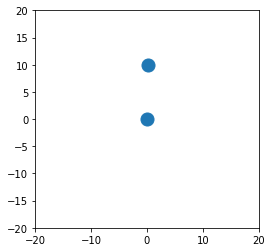

MovieWriter ffmpeg unavailable; using Pillow instead.


./tmp_v9cxx5n.gif


In [50]:
import matplotlib.pyplot as plt
import numpy as np

import time

from matplotlib import animation
from IPython.display import HTML
import tempfile; tempfile.tempdir='./'

def animate(poslist_frames,Ratom_anim = 0.003, lims=(-10,10)):
    poslist_frames = np.array(poslist_frames)

    # Generate animation
    width = 4 # width of plot in inches

    # set-up figure and ax
    fig, ax = plt.subplots(figsize=(width,width))
    ax.set_xlim((lims[0], lims[1]))
    ax.set_ylim((lims[0], lims[1]))

    # convert atom size to figure units
    t = ax.transAxes.transform([(0,0), (Ratom_anim,Ratom_anim)])
    Ratom_pts = (t[1,1]-t[0,0]) * 72/fig.dpi
    s_circ = (Ratom_pts * 2)**2

    def init_model():
        ax.set_xlim((lims[0], lims[1]))
        ax.set_ylim((lims[0], lims[1]))
        simgraph = ax.scatter([], [])
        return (simgraph,)

    def animate_model(i):
        ax.clear()
        ax.set_xlim((lims[0], lims[1]))
        ax.set_ylim((lims[0], lims[1]))
        simgraph = ax.scatter(poslist_frames[i][:,0], poslist_frames[i][:,1], s=s_circ)
        return (simgraph,)

    print("here is first frame, when ready may need to click 'fetch additional output' to watch movie:")
    animate_model(1)
    plt.show()

    # run to generate the html5 video of the positions
    # (takes about 30s for 100 frames)
    # click 'Fetch additional output to see'
    anim = animation.FuncAnimation(fig, animate_model, init_func=init_model,
                                  frames=len(poslist_frames), interval=40)
    
    
    fname = tempfile.mktemp('.gif')
    print(fname)
    anim.save(fname)
    time.sleep(0.1) # make sure file is saved
    return display(HTML("""
                <image style="width:200" src="{}" >
                """.format(fname)))


Ratom = 0.03 # meters -- grossly exagerated
L = 1 # meters


simu = sim([Particle(200,0,0), Particle(10,0,10,2,0)])
dt = 0.1
for _ in range(100):
    simu.update_system(dt)

p = simu.posList

animate(p, Ratom_anim=Ratom, lims=(-20,20))

array([ 0., 10.])